# Data Science Stack Exchange

## Introduction

High level business question: what is the best content to produce on the topic of Data Science?

Aim is to start with some exploration of the Data Science Stack Exchange (DSSE) website.

A brief overview of the [DSSE](https://datascience.stackexchange.com/) website:

- The site for users to provide answers to Data Science questions. They should be related to an actual problem and should not be questions asking for opinions or intended to generate discussions. Programming specific questions are likely better suited to [Stack Overflow](https://stackoverflow.com/).
- The site is primarily focussed on questions and answers, with three primary views to navigate the questions:
    - Questions: all questions, with filtering options.
    - Tags: explore questions with specfic tagging.
    - Unanswered: questions that have not been answered or closed.
- The site has a section to browse user profiles, which show specific contributions to the community with respect to questions submitted or answered.
- The site has an external link to the Stack Overflow job market site.
- More info is available on the website's [tour](https://datascience.stackexchange.com/tour) page.

## Stack Exchange Data Explorer

The Stack Exchange Data Explorer contains the many tables in the [DSSE database](https://data.stackexchange.com/datascience/queries); ones that may be particularly useful for understanding good quality or desireable content would be 'Posts', 'Comments', and 'Users'. Perhaps also 'PostTags', 'Tags', and 'Votes'.

In the first instance, the 'Posts' table has been queried to pull data for posts in 2019. Each entry in this table can be one of multiple types of tables, but the vast majority are questions or answers. The provisional focus will be on all question posts from 2019. The following query was run to obtain specific columns for these entries, and has been exported to [2019_questions.csv](./2019_questions.csv):

>```
  SELECT Id,
         PostTypeId,
         CreationDate,
         Score,
         ViewCount,
         Tags,
         AnswerCount,
         FavoriteCount
    FROM Posts
   WHERE YEAR(CreationDate) = 2019
     AND PostTypeId = 1;
```
>

## Importing and Cleaning the Data

In [1]:
import pandas as pd

questions_2019 = pd.read_csv('./2019_questions.csv', parse_dates=['CreationDate'])
print(questions_2019.info())
print('\nFavoriteCount frequency table:\n', questions_2019['FavoriteCount'].value_counts())
questions_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7775 entries, 0 to 7774
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7775 non-null   int64         
 1   PostTypeId     7775 non-null   int64         
 2   CreationDate   7775 non-null   datetime64[ns]
 3   Score          7775 non-null   int64         
 4   ViewCount      7775 non-null   int64         
 5   Tags           7775 non-null   object        
 6   AnswerCount    7775 non-null   int64         
 7   FavoriteCount  1514 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 486.1+ KB
None

FavoriteCount frequency table:
 1.0     990
2.0     243
0.0     164
3.0      57
4.0      26
5.0      12
6.0       8
7.0       6
12.0      2
8.0       2
10.0      1
13.0      1
16.0      1
11.0      1
Name: FavoriteCount, dtype: int64


,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,51345,1,2019-05-03 20:48:37,1,387,<neural-network><keras><loss-function>,0,NaN
1,51346,1,2019-05-03 22:00:19,0,128,<python><xgboost>,1,NaN
2,51348,1,2019-05-03 22:42:39,5,2839,<machine-learning><python><dataset><data-clean...,1,3.0
3,51351,1,2019-05-04 01:42:58,1,172,<orange><orange3>,1,NaN
4,51352,1,2019-05-04 01:45:45,2,64,<visualization>,2,1.0


In [2]:
tags = questions_2019['Tags'].str.replace('><', ',').str.replace(r'[<>]', '').str.split(',',expand=True)
tags_count = tags.stack().value_counts()
print(tags_count)
tags_list = tags.stack().value_counts().index.tolist()

machine-learning     2391
python               1619
deep-learning        1048
neural-network        939
keras                 822
                     ... 
hog                     1
hashingvectorizer       1
manifold                1
categories              1
redshift                1
Length: 502, dtype: int64


Importing 2019_questions.csv into a Pandas DataFrame shows that all columns have non-null entries apart from `FavoriteCount`, for which only 16% of entries are non-null. Since this column represents the number of users who have bookmarked or favoured a post, it can be assumed that a null entry is equivalent to zero. After filling the null entries in this column with zeroes, the column data type can be converted to integer.

The `Tags` column contains multiple string tags, each surrounded by angled brackets (e.g. **<python\>**). As it is, the column is not set up for analysis because variation in tags and numbers of tags are amalgamated in a single column. One way to address this would be to create a new boolean column for each distinct tag, where True indicates the question includes that tag. However, as shown above, there are 502 distinct tag strings in the data set. For now a list of these tags has been created as a separate variable, and the string format of the `Tags` column can be replaced with comma-separated text.

In [3]:
questions_2019['FavoriteCount'] = questions_2019['FavoriteCount'].fillna(0).astype('int64')
questions_2019['Tags'] = questions_2019['Tags'].str.replace('><', ',').str.replace(r'[<>]', '')
print(questions_2019.info(),'\n')
questions_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7775 entries, 0 to 7774
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7775 non-null   int64         
 1   PostTypeId     7775 non-null   int64         
 2   CreationDate   7775 non-null   datetime64[ns]
 3   Score          7775 non-null   int64         
 4   ViewCount      7775 non-null   int64         
 5   Tags           7775 non-null   object        
 6   AnswerCount    7775 non-null   int64         
 7   FavoriteCount  7775 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 486.1+ KB
None 



,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,51345,1,2019-05-03 20:48:37,1,387,"neural-network,keras,loss-function",0,0
1,51346,1,2019-05-03 22:00:19,0,128,"python,xgboost",1,0
2,51348,1,2019-05-03 22:42:39,5,2839,"machine-learning,python,dataset,data-cleaning,...",1,3
3,51351,1,2019-05-04 01:42:58,1,172,"orange,orange3",1,0
4,51352,1,2019-05-04 01:45:45,2,64,visualization,2,1


Null entries in the `FavoriteCount` column have been filled with zeroes, and tags have been formatted into comma-separated strings.

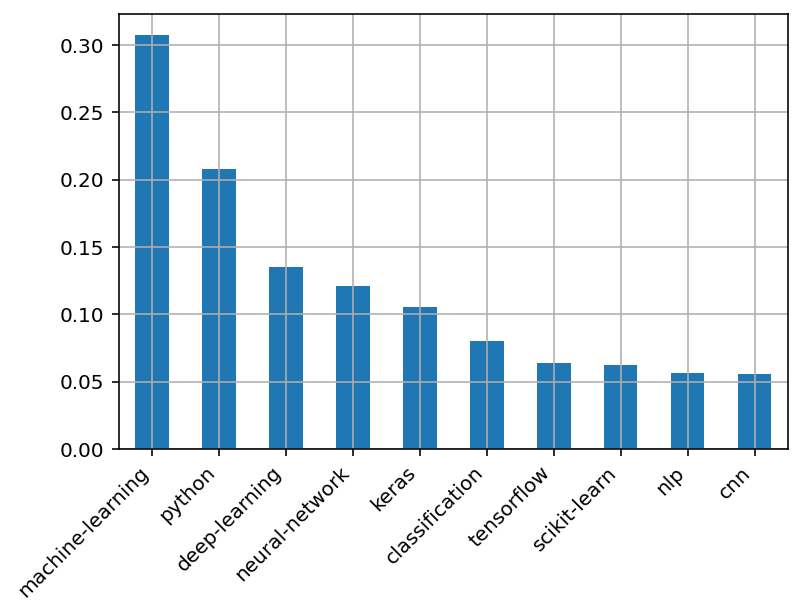

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tag_usage = pd.DataFrame(columns=['Count', 'Perc'])
tag_usage['Count'] = tags_count
tag_usage['Perc'] = tag_usage['Count'] / questions_2019.shape[0]

tag_usage['Perc'].head(10).plot(kind='bar', grid=True)
plt.xticks(rotation=45, ha='right')
plt.show()

The above plot shows the percentage of questions posted in 2019 that used a given tag. The bars aren't cumulative because questions could be tagged with both 'machine-learning' and 'python', for example. Nearly a third of posted questions used the tag 'machine-learning', and around a fifth of posted questions used the tag 'python'. The rest of the top 10 tags were respectively used in around 5-15% of questions.

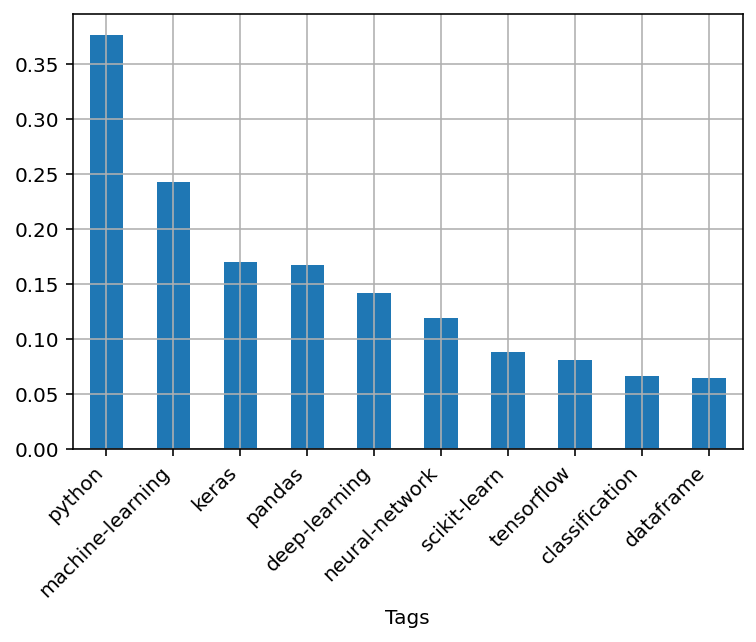

In [39]:
tag_views = pd.DataFrame(columns=['Tags', 'ViewCount'])
for col in tags.columns:
    df = pd.DataFrame(columns=['Tags', 'ViewCount'])
    df['Tags'] = tags[col]
    df['ViewCount'] = questions_2019['ViewCount']
    tag_views = tag_views.append(df, ignore_index=True)

tag_total_views = tag_views.groupby('Tags').agg('sum').sort_values('ViewCount', ascending=False)
tag_total_views['ViewPerc'] = tag_total_views['ViewCount'] / questions_2019['ViewCount'].sum()
tag_total_views['ViewPerc'].head(10).plot(kind='bar', grid=True)
plt.xticks(rotation=45, ha='right')
plt.show()

The above plot shows the percentage of total views that were for questions that contained a given tag. For example, nearly 40% of views were for questions that were tagged 'python'. Similarly, nearly a quarter of views were for questions with tagged 'machine-learning'. While these two tags appear to dominate the number of views, they also have the highest volume of questions.

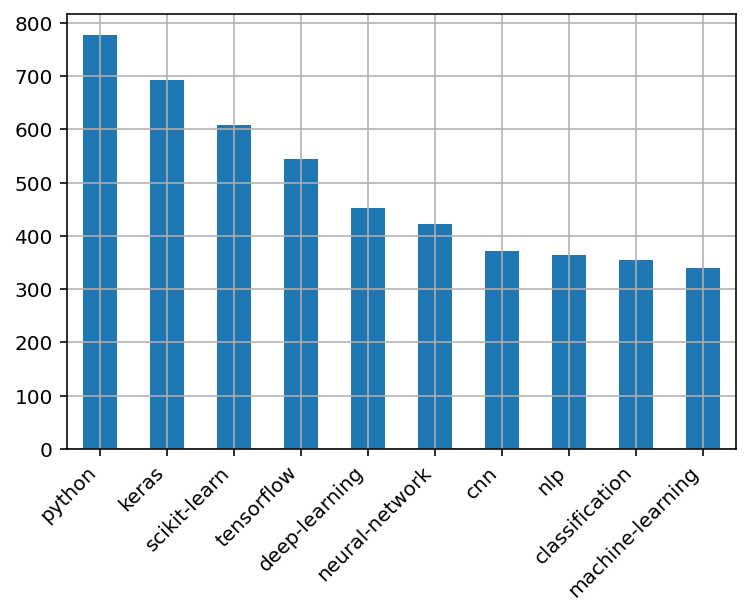

In [51]:
tag_usage_views = tag_total_views.merge(tag_usage, how='outer', left_index=True, right_index=True)
tag_usage_views['ViewPerQuestion'] = tag_usage_views['ViewCount'] / tag_usage_views['Count']
count_gt_100 = tag_usage_views['Count'] > questions_2019.shape[0] * 0.05
sorted_views_per_q = tag_usage_views[count_gt_100].sort_values('ViewPerQuestion', ascending=False)
sorted_views_per_q['ViewPerQuestion'].head(10).plot(kind='bar', grid=True)
plt.xticks(rotation=45, ha='right')
plt.show()

A merged DataFrame has been created from the question count and view count data for each tag. The column `ViewPerQuestion` calculates the ratio of view count to question count, as a rough metric to suggest how many views a question with a given tag will get. The above plot shows the top 10 view-per-question values for tags that have been used in more than 5% of questions. Considering tags that have been used in fewer questions may lead to skewed view-per-question data if one or two questions have unusually high view numbers. This view of the data suggests that 'python', 'keras', 'scikit-learn' and 'tensorflow' tags are especially popular, with greater than 500 views-per-question.